<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_04/CAP417_HandsOn_04_Aurelienne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAP417 - Computational Statistics - 2022** 

Aurelienne Jorge

Alex Fernandes

---

In [ ]:
!pip install --upgrade scipy

     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## 1. About the datasets



*   Set of **382 precipitation events**;
*   Source: The events were tracked by a software named 'TATHU' using **weather radar data**;
*   Spatial Domain: **The Metropolitan Area of São Paulo (MASP);**
*   Temporal Domain: **JFM/2019;**
*   **(geo)graph** built up for each one of these events, using Pearson Correlation as similarity measure; 
*   **Network metrics** added to the Dataset;

Here we present 2 datasets:

*   In the first one, (geo)graphs are built up considering a time delay when analyzing the correlations;
*   In the second one, (geo)graphs are built up only with synchronous correlations (without time delay);

Both of them present the same size and variables.



In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Dataset without time delay
df_notdelay = pd.read_csv('https://raw.githubusercontent.com/aurelienne/graph4gis/master/data/eventos_rmsp_proc_metrics_notdelay.csv', index_col="id")
df_notdelay[0:4].style

# Dataset with time delay
df = pd.read_csv('https://raw.githubusercontent.com/aurelienne/graph4gis/master/data/eventos_rmsp_proc_metrics_tdelay.csv', index_col="id")
df[0:4].style

,start,end,duration,peak-time,peak-reflect_max,peak-reflect_avg,peak-area,peak-area_px,peak_lat,peak_lon,min-speed,avg-speed,max-speed,min-area,avg-area,max-area,avg-reflect_avg,avg-reflect_max,delta-reflect,num_simult_events,threshold,vertices,edges,cluster_coef,avg_degree,diameter,shortpath_mean,avg_betweeness,num_components,giant_component,singletons,t_delay
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00ace48b-4768-43b2-a625-e6c6c2a6bb20,2019-01-04 00:00:00,2019-01-04 01:40:00,1.666667,2019-01-04 00:20:00,34.010000,25.767252,88.498350,80,-23.921408,-46.187893,0.505518,3.535354,6.504063,25.443275,62.225402,88.498350,24.398523,29.521666,5.123144,1,0.950000,7411,2426911,0.632293,654.948320,10,2.724401,6255.051950,76,7314,57,30.000000
01c4b54a-c8e9-4f1f-b783-229d3af0073e,2019-03-09 22:30:00,2019-03-10 01:20:00,2.833333,2019-03-09 23:30:00,66.510000,46.760130,2519.990500,2278,-23.125643,-45.953022,0.575905,7.639164,28.442068,40.930485,1671.803666,3432.629600,36.244893,50.158421,13.913528,8,0.890000,2603,361883,0.798079,278.050711,13,3.288818,2836.583557,41,2503,19,10.000000
03618a3d-8fe6-489a-8e5f-34ec9cedb737,2019-01-04 12:20:00,2019-01-04 14:50:00,2.500000,2019-01-04 12:50:00,53.210000,36.460560,212.396040,192,-23.710257,-46.307160,1.589480,5.224965,15.654534,34.293110,148.299805,328.550100,28.487245,36.952941,8.465696,8,0.820000,1693,362852,0.761260,428.649734,9,2.390008,1174.557590,2,1692,1,10.000000
03d803b9-c46e-4dfb-868a-46b445018c0b,2019-03-20 12:40:00,2019-03-20 14:40:00,2.000000,2019-03-20 13:20:00,38.030000,26.522678,119.472770,108,-23.784723,-45.832787,1.601832,4.787264,10.011489,9.956064,59.262287,150.447190,24.580098,30.107856,5.527758,9,0.770000,227,11178,0.828119,98.484581,6,1.966161,109.176211,1,227,0,10.000000


## 2. The samples


 \begin{array}{ KLL }
        {\textbf{Group}} & {\textbf{Filter}} & {\textbf{Number of Events}} \\         
        \text{D1} & \text{Duration $\leq$ 2 hours} & \text{114} \\
        \text{D2} & \text{Duration > 5 hours} & \text{53} \\
        \text{A1} & \text{Area $\leq$ 300 km²} & \text{70} \\
        \text{A2} & \text{Area $\geq$ 5000 km²} & \text{60} \\
    \end{array}

In [ ]:
# Groups WITH TIME DELAY
d1_group = df.loc[(df["duration"] <= 2)]
d2_group = df.loc[(df["duration"] > 5)]
a1_group = df.loc[(df["max-area"] <= 300)]
a2_group = df.loc[(df["max-area"] > 5000)]

# Groups WITHOUT TIME DELAY
d1_group_nt = df_notdelay.filter(items=d1_group.index, axis=0)
d2_group_nt = df_notdelay.filter(items=d2_group.index, axis=0)
a1_group_nt = df_notdelay.filter(items=a1_group.index, axis=0)
a2_group_nt = df_notdelay.filter(items=a2_group.index, axis=0)

### 2.1 'Num_Components' samples


---

SAMPLES:

$a1n$ = Sample (group) of 'num_components' values from small-extension events;

$a2n$ = Sample (group) of 'num_components' values from large-extension events;

$d1n$ = Sample (group) of 'num_components' values from short-duration events;

$d2n$ = Sample (group) of 'num_components' values from long-duration events;

---
POPULATIONS:

$A1n$ = Population from which $a1n$ was sampled;

$A2n$ = Population from which $a2n$ was sampled;

$D1n$ = Population from which $d1n$ was sampled;

$D2n$ = Population from which $d2n$ was sampled;

---

In [ ]:
# With Time delay
a1n = a1_group['num_components']
a2n = a2_group['num_components']
d1n = d1_group['num_components']
d2n = d2_group['num_components']

# Without Time delay
a1n_nt = a1_group_nt['num_components']
a2n_nt = a2_group_nt['num_components']
d1n_nt = d1_group_nt['num_components']
d2n_nt = d2_group_nt['num_components']

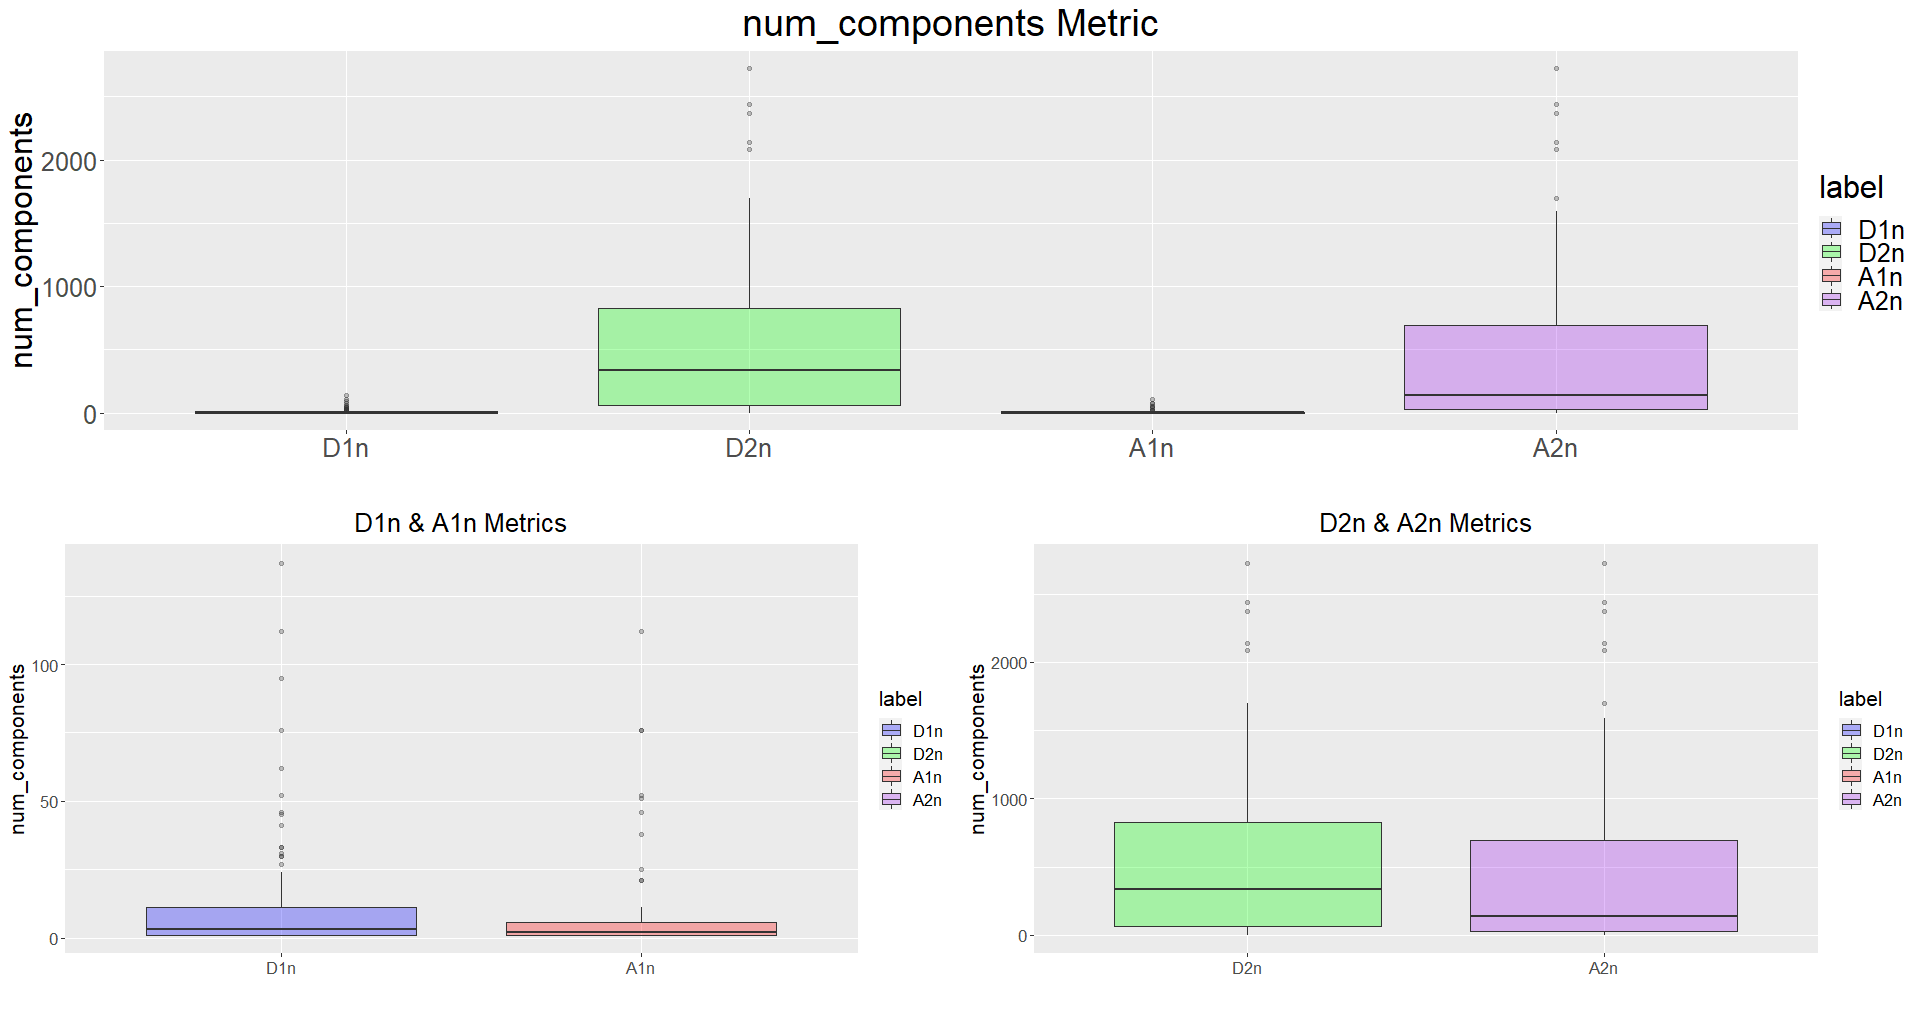


---

SAMPLES (without time delay):

$a1n\_nt$ = Sample (group) of 'num_components' values from small-extension events;

$a2n\_nt$ = Sample (group) of 'num_components' values from large-extension events;

$d1n\_nt$ = Sample (group) of 'num_components' values from short-duration events;

$d2n\_nt$ = Sample (group) of 'num_components' values from long-duration events;

---
POPULATIONS:

$A1n\_nt$ = Population from which $a1n\_nt$ was sampled;

$A2n\_nt$ = Population from which $a2n\_nt$ was sampled;

$D1n\_nt$ = Population from which $d1n\_nt$ was sampled;

$D2n\_nt$ = Population from which $d2n\_nt$ was sampled;

---

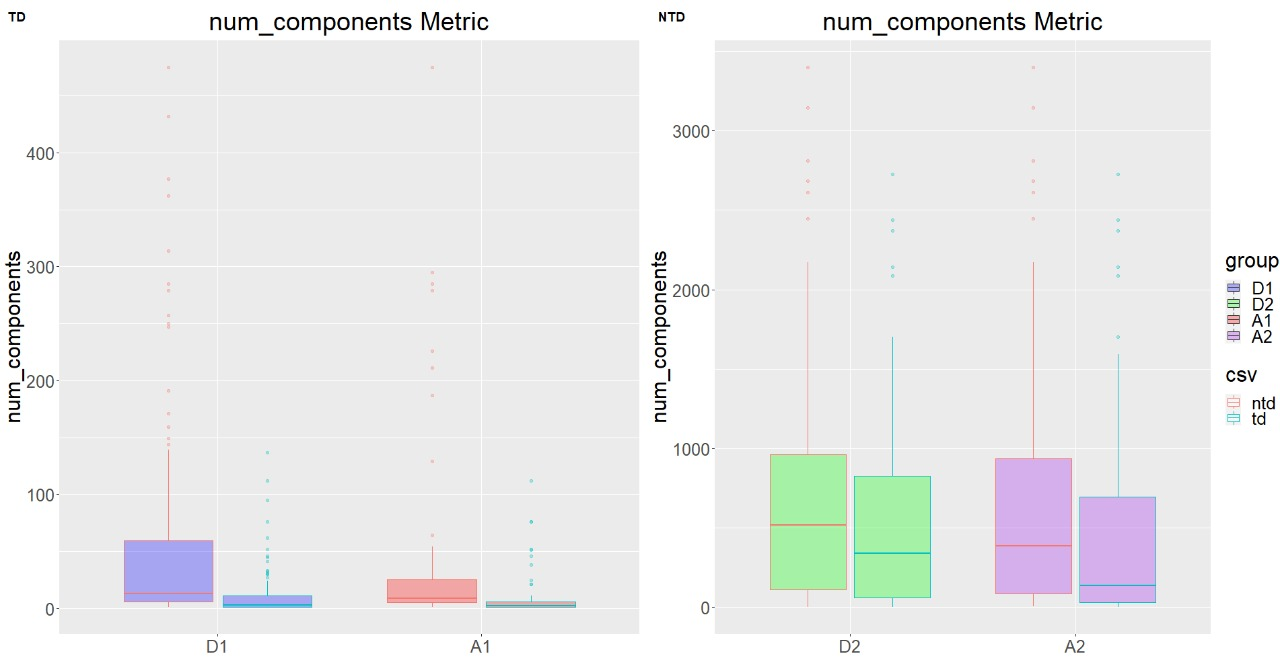

### 2.2 'Avg_betweeness' samples


---

SAMPLES:

$a1b$ = Sample (group) of 'avg_betweeness' values from small-extension events;

$a2b$ = Sample (group) of 'avg_betweeness' values from large-extension events;

$d1b$ = Sample (group) of 'avg_betweeness' values from short-duration events;

$d2b$ = Sample (group) of 'avg_betweeness' values from long-duration events;

---
POPULATIONS:

$A1b$ = Population from which $a1b$ was sampled;

$A2b$ = Population from which $a2b$ was sampled;

$D1b$ = Population from which $d1b$ was sampled;

$D2b$ = Population from which $d2b$ was sampled;

---

In [ ]:
a1b = a1_group['avg_betweeness']
a2b = a2_group['avg_betweeness']
d1b = d1_group['avg_betweeness']
d2b = d2_group['avg_betweeness']

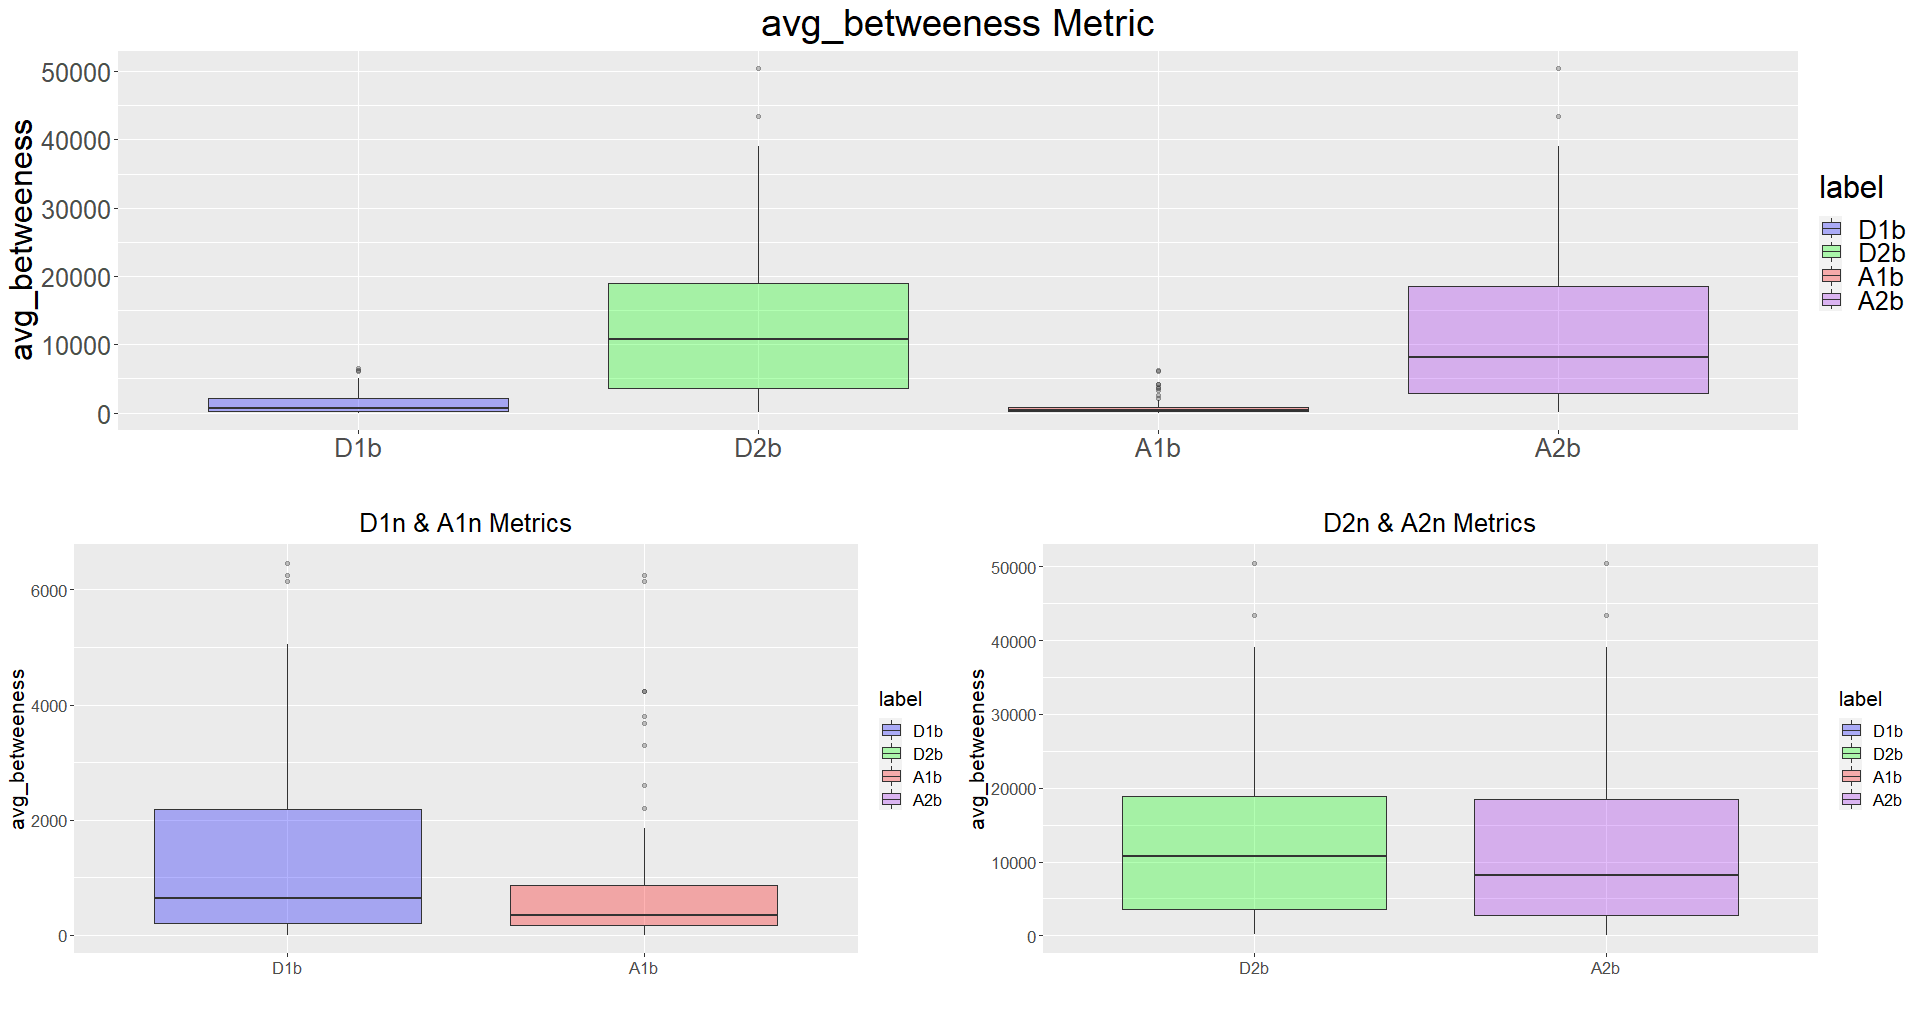

## 3. Shapiro-Wilk Test: Normality Hypothesis Test

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

---


$H_0:$ The group is sampled from a normal distribution;

$H_a:$ The group is sampled from a non-normal distribution;


---


$IC = 95\% => \alpha = 0.05$

**To reject $H_0: p-value < alpha$**

In [ ]:
from scipy import stats

def shapiro_test(name, sample, alfa):
  stat, pvalue = stats.shapiro(sample)
  if pvalue < alfa: 
    print(name+" is sampled from a non-normal distribution (p-value = "+str(pvalue)+")")
  else:
    print(name+" is sampled from a normal distribution (p-value = "+str(pvalue)+")")

alfa = 0.05
print("Shapiro-wilk Test:")
print("")

# Num_components Samples
shapiro_test('a1n', a1n, alfa)
shapiro_test('a2n', a2n, alfa)
shapiro_test('d1n', d1n, alfa)
shapiro_test('d2n', d2n, alfa)
print("")

# Avg_betweeness Samples
shapiro_test('a1b', a1b, alfa)
shapiro_test('a2b', a2b, alfa)
shapiro_test('d1b', d1b, alfa)
shapiro_test('d2b', d2b, alfa)

Shapiro-wilk Test:

a1n is sampled from a non-normal distribution (p-value = 2.8847682299578195e-14)
a2n is sampled from a non-normal distribution (p-value = 6.7559735583699876e-09)
d1n is sampled from a non-normal distribution (p-value = 2.419666908042769e-17)
d2n is sampled from a non-normal distribution (p-value = 3.456068498053355e-07)

a1b is sampled from a non-normal distribution (p-value = 7.996115922170866e-12)
a2b is sampled from a non-normal distribution (p-value = 8.376040568691678e-06)
d1b is sampled from a non-normal distribution (p-value = 1.1467997558523013e-11)
d2b is sampled from a non-normal distribution (p-value = 0.00016187656729016453)


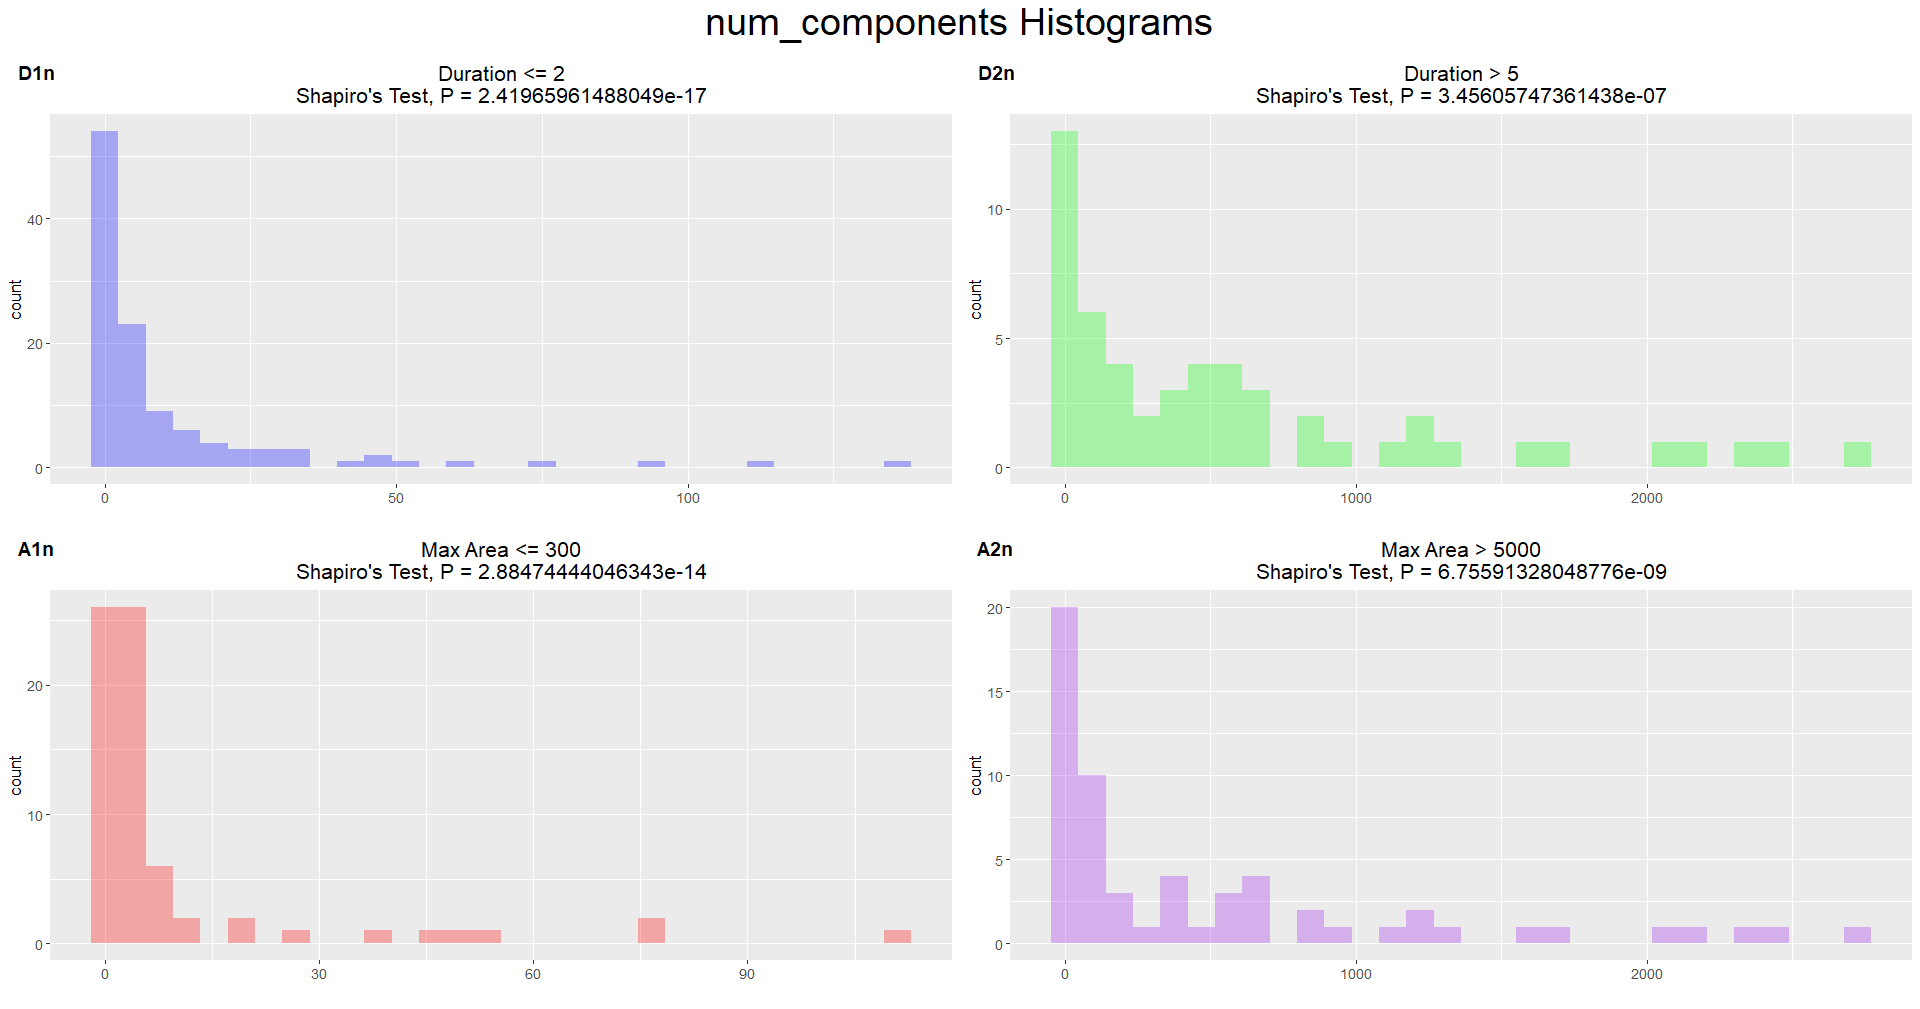

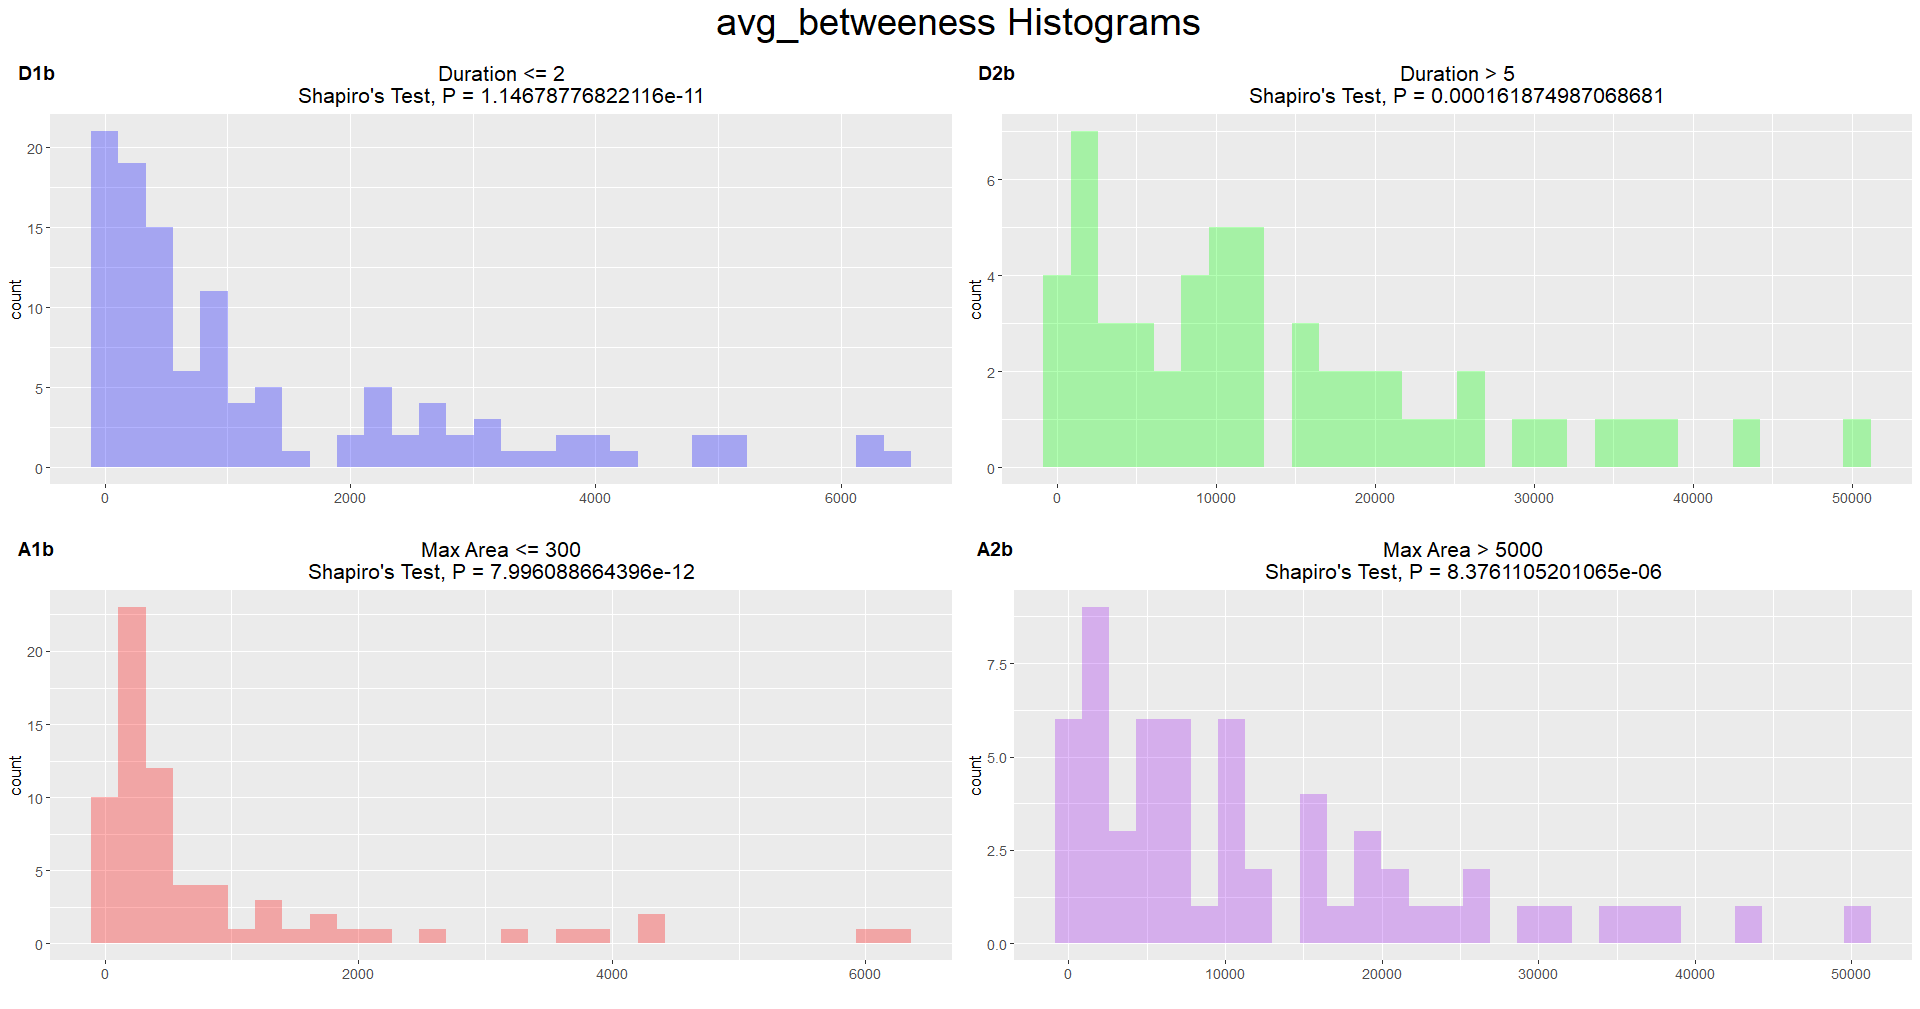

## 4. Hypothesis Test for comparison of distributions


---

$H_0:$ The groups are sampled from populations with identical distributions.

$H_a:$ The groups are sampled from populations with different distributions: 

*   $A1n$ < $A2n$
*   $D1n$ < $D2n$
*   $A1b$ < $A2b$
*   $D1b$ < $D2b$
---

$IC = 95\% => \alpha = 0.05$

---

**To reject $H_0: p-value < alpha$**

---


### 4.1 The Mann-Whitney Test

The Mann-Whitney U test is a **nonparametric** test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y.

Let F(u) and G(u) be the cumulative distribution functions of the distributions underlying x and y, respectively. The following Alternative Hypothesis are available:
*   *‘two-sided’*: the distributions are not equal, i.e. F(u) ≠ G(u) for at least one u;
*   *‘less’*: the distribution underlying x is stochastically less than the distribution underlying y, i.e. F(u) > G(u) for all u;
*   *‘greater’*: the distribution underlying x is stochastically greater than the distribution underlying y, i.e. F(u) < G(u) for all u.





In [ ]:
def mannwhitneyu_test(name1, name2, sample1, sample2, alfa):
  stat, pvalue = stats.mannwhitneyu(sample1, sample2, alternative='two-sided') # the distributions are not equal
  print("Mann-Whitney Test - Alternative Hypothesis: two-sided")
  if pvalue < alfa:
    print("p-value = "+str(pvalue)+" -> " +name1+" and "+name2+" are sampled from DIFFERENT distributions")
  else:
    print("p-value = "+str(pvalue)+" -> " +name1+" and "+name2+" are sampled from EQUAL distributions")
  print("")
  stat, pvalue = stats.mannwhitneyu(d1n, d2n, alternative='less')      # the distribution underlying x is stochastically less than the distribution underlying y 
  print("Mann-Whitney Test - Alternative Hypothesis: X less than Y")
  if pvalue < alfa:
    print("p-value = "+str(pvalue)+" -> The distribution underlying "+name1+" IS stochastically LESS than the distribution underlying "+name2)
  else:
    print("p-value = "+str(pvalue)+" -> The distribution underlying "+name1+" is NOT stochastically LESS than the distribution underlying "+name2)
  print("")
  stat, pvalue = stats.mannwhitneyu(d1n, d2n, alternative='greater')   # the distribution underlying x is stochastically greater than the distribution underlying y
  print("Mann-Whitney Test - Alternative Hypothesis: X greater than Y")
  if pvalue < alfa:
    print("p-value = "+str(pvalue)+" -> The distribution underlying "+name1+" IS stochastically GREATER than the distribution underlying "+name2)
  else:
    print("p-value = "+str(pvalue)+" -> The distribution underlying "+name1+" is NOT stochastically GREATER than the distribution underlying "+name2)
  
alfa=0.05

#### 4.1.1 Num_components Samples

In [ ]:
# Num_components Samples - Area Groups
mannwhitneyu_test("A1n", "A2n", a1n, a2n, alfa)

Mann-Whitney Test - Alternative Hypothesis: two-sided
p-value = 9.470383778137968e-16 -> A1n and A2n are sampled from DIFFERENT distributions

Mann-Whitney Test - Alternative Hypothesis: X less than Y
p-value = 2.903590196984651e-17 -> The distribution underlying A1n IS stochastically LESS than the distribution underlying A2n

Mann-Whitney Test - Alternative Hypothesis: X greater than Y
p-value = 1.0 -> The distribution underlying A1n is NOT stochastically GREATER than the distribution underlying A2n


In [ ]:
# Num_components Samples - Duration Groups
mannwhitneyu_test("d1n", "d2n", a1n, a2n, alfa)

Mann-Whitney Test - Alternative Hypothesis: two-sided
p-value = 9.470383778137968e-16 -> d1n and d2n are sampled from different distributions

Mann-Whitney Test - Alternative Hypothesis: X less than Y
p-value = 2.903590196984651e-17 -> The distribution underlying d1n is stochastically less than the distribution underlying d2n

Mann-Whitney Test - Alternative Hypothesis: X greater than Y
p-value = 1.0 -> The distribution underlying d1n is NOT stochastically greater than the distribution underlying d2n


#### 4.1.2 Avg_betweeness Samples

In [ ]:
# Avg_betweeness Samples - Area Groups
mannwhitneyu_test("a1b", "a2b", a1n, a2n, alfa)

Mann-Whitney Test - Alternative Hypothesis: two-sided
p-value = 9.470383778137968e-16 -> a1b and a2b are sampled from different distributions

Mann-Whitney Test - Alternative Hypothesis: X less than Y
p-value = 2.903590196984651e-17 -> The distribution underlying a1b is stochastically less than the distribution underlying a2b

Mann-Whitney Test - Alternative Hypothesis: X greater than Y
p-value = 1.0 -> The distribution underlying a1b is NOT stochastically greater than the distribution underlying a2b


In [ ]:
# Avg_betweeness Samples - Duration Groups
mannwhitneyu_test("d1b", "d2b", a1n, a2n, alfa)

Mann-Whitney Test - Alternative Hypothesis: two-sided
p-value = 9.470383778137968e-16 -> d1b and d2b are sampled from different distributions

Mann-Whitney Test - Alternative Hypothesis: X less than Y
p-value = 2.903590196984651e-17 -> The distribution underlying d1b is stochastically less than the distribution underlying d2b

Mann-Whitney Test - Alternative Hypothesis: X greater than Y
p-value = 1.0 -> The distribution underlying d1b is NOT stochastically greater than the distribution underlying d2b


### 4.2 T-Test (scipy.stats.ttest_ind)


This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. 

Alternative Hypothesis options:
*   *‘two-sided’*: the means of the distributions underlying the samples are unequal;
*   *‘less’*: the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample;
*   *‘greater’*: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.



In [ ]:
def exec_ttest(name1, name2, sample1, sample2, alfa):
  stat, pvalue = stats.ttest_ind(sample1, sample2, alternative='two-sided') # the distributions are not equal
  print("T-Test - Alternative Hypothesis: two-sided")
  if pvalue < alfa:
    print("p-value = "+str(pvalue)+" -> " +name1+" and "+name2+" are sampled from DIFFERENT distributions")
  else:
    print("p-value = "+str(pvalue)+" -> " +name1+" and "+name2+" are sampled from EQUAL distributions")
  print("")
  stat, pvalue = stats.ttest_ind(d1n, d2n, alternative='less')      # the distribution underlying x is stochastically less than the distribution underlying y 
  print("T-Test - Alternative Hypothesis: X less than Y")
  if pvalue < alfa:
    print("p-value = "+str(pvalue)+" -> The distribution underlying "+name1+" IS stochastically LESS than the distribution underlying "+name2)
  else:
    print("p-value = "+str(pvalue)+" -> The distribution underlying "+name1+" is NOT stochastically LESS than the distribution underlying "+name2)
  print("")
  stat, pvalue = stats.ttest_ind(d1n, d2n, alternative='greater')   # the distribution underlying x is stochastically greater than the distribution underlying y
  print("T-Test - Alternative Hypothesis: X greater than Y")
  if pvalue < alfa:
    print("p-value = "+str(pvalue)+" -> The distribution underlying "+name1+" IS stochastically GREATER than the distribution underlying "+name2)
  else:
    print("p-value = "+str(pvalue)+" -> The distribution underlying "+name1+" is NOT stochastically GREATER than the distribution underlying "+name2)
  
alfa=0.05

In [ ]:
# Avg_betweeness Samples - Area Groups
exec_ttest("a1b", "a2b", a1n, a2n, alfa)

T-Test - Alternative Hypothesis: two-sided
p-value = 1.897958329937982e-08 -> a1b and a2b are sampled from DIFFERENT distributions

T-Test - Alternative Hypothesis: X less than Y
p-value = 1.3954081024181692e-15 -> The distribution underlying a1b IS stochastically LESS than the distribution underlying a2b

T-Test - Alternative Hypothesis: X greater than Y
p-value = 0.9999999999999987 -> The distribution underlying a1b is NOT stochastically GREATER than the distribution underlying a2b


### 4.3 Wilcoxon signed-rank test: Comparing paired-samples

The Wilcoxon signed-rank test tests the null hypothesis that **two related paired samples** come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

We present below our paired samples with the 'num_components' metric for each event. The fisrt column is the measure when the network has considered a time delay, while the second one refers to the measure without time delay.

In [ ]:
print("num_components_x => with time delay")
print("num_components_y => without time delay")

paired_sample = pd.merge(df, df_notdelay, on = "id", how = "inner")
paired_sample[['num_components_x', 'num_components_y']][0:10].style

num_components_x => with time delay
num_components_y => without time delay


,num_components_x,num_components_y
id,,
00ace48b-4768-43b2-a625-e6c6c2a6bb20,76,475
01c4b54a-c8e9-4f1f-b783-229d3af0073e,41,107
03618a3d-8fe6-489a-8e5f-34ec9cedb737,2,82
03d803b9-c46e-4dfb-868a-46b445018c0b,1,7
042c2f3c-0000-41e2-bfbe-8363e4bf80ce,1701,1643
044cb4e1-e518-4ca7-95d7-25a9760887fa,2,5
04b3ac75-943a-450d-810a-b61f4453dbc5,100,130
05be5678-ce4e-4898-9d38-c2b5c915f0a3,359,375
06cdb72b-dbb7-4fdf-b600-02e8a8923c7a,1,5


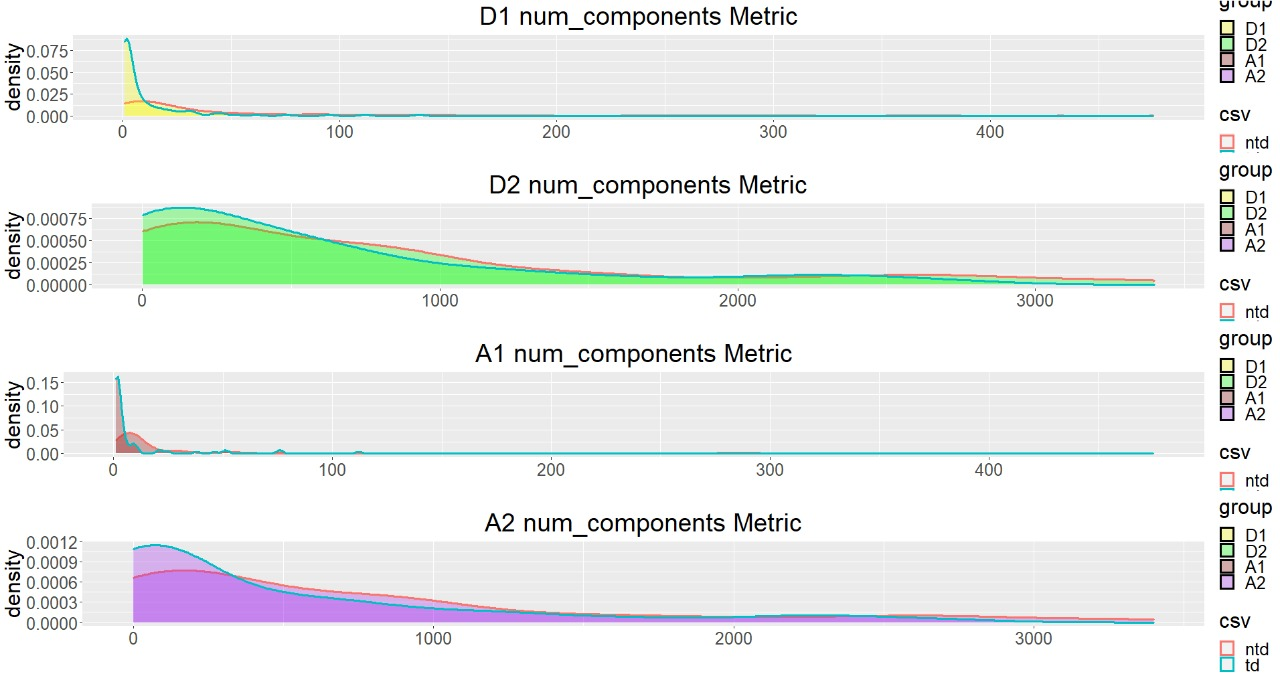


$H_0:$ The samples, with and without time delay, comes from the same distribution.

$H_a:$ The samples, with and without time delay, comes from different distributions: 

*   $A1n$ < $A1n\_nt$
*   $A2n$ < $A2n\_nt$
*   $D1n$ < $D1n\_nt$
*   $D2n$ < $D2n\_nt$
---

$IC = 95\% => \alpha = 0.05$

---

**To reject $H_0: p-value < alpha$**

---


In [ ]:
def wilcoxon_test(name1, name2, sample1, sample2, alfa):
  stat, pvalue = stats.wilcoxon(sample1, sample2, alternative='two-sided') # the distributions are not equal
  print("Wilcoxon Test - Alternative Hypothesis: two-sided")
  if pvalue < alfa:
    print("p-value = "+str(pvalue)+" -> " +name1+" and "+name2+" are sampled from DIFFERENT distributions")
  else:
    print("p-value = "+str(pvalue)+" -> " +name1+" and "+name2+" are sampled from EQUAL distributions")
  print("")
  stat, pvalue = stats.wilcoxon(sample1, sample2, alternative='less')      # the distribution underlying x is stochastically less than the distribution underlying y 
  print("Wilcoxon Test - Alternative Hypothesis: X less than Y")
  if pvalue < alfa:
    print("p-value = "+str(pvalue)+" -> The distribution underlying "+name1+" IS stochastically LESS than the distribution underlying "+name2)
  else:
    print("p-value = "+str(pvalue)+" -> The distribution underlying "+name1+" is NOT stochastically LESS than the distribution underlying "+name2)
  print("")
  stat, pvalue = stats.wilcoxon(sample1, sample2, alternative='greater')   # the distribution underlying x is stochastically greater than the distribution underlying y
  print("Wilcoxon Test - Alternative Hypothesis: X greater than Y")
  if pvalue < alfa:
    print("p-value = "+str(pvalue)+" -> The distribution underlying "+name1+" IS stochastically GREATER than the distribution underlying "+name2)
  else:
    print("p-value = "+str(pvalue)+" -> The distribution underlying "+name1+" is NOT stochastically GREATER than the distribution underlying "+name2)
  
alfa=0.05

In [ ]:
# Area groups
wilcoxon_test("a1n", "a1n_nt", a1n, a1n_nt, alfa)
print("\n")
wilcoxon_test("a2n", "a2n_nt", a2n, a2n_nt, alfa)
print("\n")

Wilcoxon Test - Alternative Hypothesis: two-sided
p-value = 1.8322554708764177e-12 -> a1n and a1n_nt are sampled from DIFFERENT distributions

Wilcoxon Test - Alternative Hypothesis: X less than Y
p-value = 9.161277354382089e-13 -> The distribution underlying a1n IS stochastically LESS than the distribution underlying a1n_nt

Wilcoxon Test - Alternative Hypothesis: X greater than Y
p-value = 0.9999999999990838 -> The distribution underlying a1n is NOT stochastically GREATER than the distribution underlying a1n_nt


Wilcoxon Test - Alternative Hypothesis: two-sided
p-value = 4.6939669210256756e-07 -> a2n and a2n_nt are sampled from DIFFERENT distributions

Wilcoxon Test - Alternative Hypothesis: X less than Y
p-value = 2.3469834605128378e-07 -> The distribution underlying a2n IS stochastically LESS than the distribution underlying a2n_nt

Wilcoxon Test - Alternative Hypothesis: X greater than Y
p-value = 0.9999997653016539 -> The distribution underlying a2n is NOT stochastically GREATER

In [ ]:
# Duration Groups
wilcoxon_test("d1n", "d1n_nt", a2n, a2n_nt, alfa)
print("\n")
wilcoxon_test("d2n", "d2n_nt", a2n, a2n_nt, alfa)

Wilcoxon Test - Alternative Hypothesis: two-sided
p-value = 4.6939669210256756e-07 -> d1n and d1n_nt are sampled from DIFFERENT distributions

Wilcoxon Test - Alternative Hypothesis: X less than Y
p-value = 2.3469834605128378e-07 -> The distribution underlying d1n IS stochastically LESS than the distribution underlying d1n_nt

Wilcoxon Test - Alternative Hypothesis: X greater than Y
p-value = 0.9999997653016539 -> The distribution underlying d1n is NOT stochastically GREATER than the distribution underlying d1n_nt


Wilcoxon Test - Alternative Hypothesis: two-sided
p-value = 4.6939669210256756e-07 -> d2n and d2n_nt are sampled from DIFFERENT distributions

Wilcoxon Test - Alternative Hypothesis: X less than Y
p-value = 2.3469834605128378e-07 -> The distribution underlying d2n IS stochastically LESS than the distribution underlying d2n_nt

Wilcoxon Test - Alternative Hypothesis: X greater than Y
p-value = 0.9999997653016539 -> The distribution underlying d2n is NOT stochastically GREATE